#  Are the sale prices and inventory listing going up or down overall in the US? 10 points 

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

### Let's start with looking at the new listings throughout the year of 10/2023-10/2024.

In [581]:
df = pd.read_csv("./for_sale_new_listings_month.csv")
df.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,323256.0,376081.0,476117.0,509438.0,538099.0,...,248801.0,299401.0,346170.0,383882.0,414294.0,380284.0,356407.0,352692.0,323542.0,318289.0
1,394913,1,"New York, NY",msa,NY,14880.0,22651.0,22492.0,25714.0,25627.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
2,753899,2,"Los Angeles, CA",msa,CA,8136.0,9261.0,10164.0,10597.0,11556.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
3,394463,3,"Chicago, IL",msa,IL,8645.0,11908.0,17472.0,16696.0,16869.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
4,394514,4,"Dallas, TX",msa,TX,7389.0,7894.0,10535.0,11797.0,11995.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
5,394692,5,"Houston, TX",msa,TX,6335.0,6996.0,9981.0,10048.0,10446.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
6,395209,6,"Washington, DC",msa,VA,5023.0,6791.0,9830.0,11019.0,10581.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
7,394974,7,"Philadelphia, PA",msa,PA,5432.0,7048.0,8527.0,9727.0,10074.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
8,394856,8,"Miami, FL",msa,FL,12468.0,11433.0,12561.0,11157.0,10715.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
9,394347,9,"Atlanta, GA",msa,GA,6902.0,8117.0,10584.0,11018.0,11152.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0


In [583]:
df.tail(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
902,394805,916,"Los Alamos, NM",msa,NM,24.0,23.0,22.0,36.0,40.0,...,19.0,14.0,15.0,30.0,29.0,27.0,31.0,27.0,39.0,35.0
903,786265,917,"West Point, MS",msa,MS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,10.0,9.0,9.0,12.0,10.0
904,394678,918,"Hereford, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,13.0,8.0,11.0,10.0,18.0,8.0,15.0,11.0,10.0,13.0
905,845168,919,"Pearsall, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
906,394330,920,"Andrews, TX",msa,TX,19.0,22.0,28.0,32.0,32.0,...,14.0,23.0,19.0,24.0,17.0,22.0,19.0,13.0,20.0,13.0
907,786253,921,"Brownsville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.0,14.0,8.0,10.0,14.0,13.0,13.0,9.0
908,395112,922,"Spirit Lake, IA",msa,IA,37.0,47.0,76.0,56.0,88.0,...,21.0,33.0,42.0,42.0,50.0,41.0,40.0,59.0,36.0,35.0
909,394594,923,"Fitzgerald, GA",msa,GA,8.0,14.0,15.0,13.0,18.0,...,13.0,9.0,14.0,9.0,15.0,5.0,11.0,15.0,15.0,14.0
910,753927,924,"Winnemucca, NV",msa,NV,NaN,NaN,NaN,NaN,NaN,...,13.0,10.0,25.0,16.0,15.0,16.0,15.0,15.0,18.0,17.0
911,394841,925,"Maysville, KY",msa,KY,19.0,22.0,17.0,43.0,38.0,...,18.0,6.0,22.0,17.0,17.0,20.0,16.0,17.0,18.0,13.0


In [585]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
Length: 87, dtype: object

### Decided to do some data clean up here. I only care about the last couple years worth of data give or take. For 2024, since we only have the months of January-February, I'll make sure to only use the same months for 2023 for accurate comparisons. All previous dates before 2023 will be dropped.
### Looking at the data earlier, the first row of the data is just an aggregate of all the states. This row will be removed as it will surely be a significant outlier that can skew the data.
### I also see that the RegionName has the city and state while the StateName column has the state. I don't think we need the state in 2 columns so I'll remove the state abbreviation in the RegionName column.

In [588]:
start_date = '2018-01-31'
end_date = '2022-12-31'

df = df.drop(index=0).reset_index(drop=True)

date_columns = [col for col in df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

columns_to_drop = [col for col in date_columns if start_date <= col <= end_date]
df = df.drop(columns=columns_to_drop)

df["RegionName"] = df["RegionName"].apply(lambda x: x.split(',')[0])
df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
5,395209,6,Washington,msa,VA,3628.0,4096.0,6589.0,6329.0,6434.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
6,394974,7,Philadelphia,msa,PA,3981.0,4354.0,5888.0,5793.0,6090.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
7,394856,8,Miami,msa,FL,9175.0,8727.0,9678.0,8372.0,9086.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
8,394347,9,Atlanta,msa,GA,4895.0,5426.0,7249.0,6522.0,7427.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0
9,394404,10,Boston,msa,MA,2416.0,2636.0,4458.0,4163.0,5062.0,...,2538.0,2993.0,3692.0,5024.0,5856.0,4788.0,3755.0,3143.0,4895.0,4016.0


In [590]:
df.count()

RegionID      921
SizeRank      921
RegionName    921
RegionType    921
StateName     921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

### Renaming some columns since the originals are a little lengthy and my changes on one columnm are different.

In [593]:
df = df.rename(columns={"SizeRank": "Rank", "RegionName": "City", "StateName": "State"})
df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
5,395209,6,Washington,msa,VA,3628.0,4096.0,6589.0,6329.0,6434.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
6,394974,7,Philadelphia,msa,PA,3981.0,4354.0,5888.0,5793.0,6090.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
7,394856,8,Miami,msa,FL,9175.0,8727.0,9678.0,8372.0,9086.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
8,394347,9,Atlanta,msa,GA,4895.0,5426.0,7249.0,6522.0,7427.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0
9,394404,10,Boston,msa,MA,2416.0,2636.0,4458.0,4163.0,5062.0,...,2538.0,2993.0,3692.0,5024.0,5856.0,4788.0,3755.0,3143.0,4895.0,4016.0


### Let's start seeing if there are any duplicates we need to remove.

In [596]:
df.shape

(921, 27)

In [598]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 27)


In [600]:
df.count()

RegionID      921
Rank          921
City          921
RegionType    921
State         921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

In [602]:
df = df.drop_duplicates()
df.count()

RegionID      921
Rank          921
City          921
RegionType    921
State         921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

### Now let's drop null or NaN values.

In [605]:
print(df.isnull().sum())

RegionID       0
Rank           0
City           0
RegionType     0
State          0
2023-01-31    23
2023-02-28    19
2023-03-31    20
2023-04-30    20
2023-05-31    20
2023-06-30    19
2023-07-31    18
2023-08-31    19
2023-09-30    18
2023-10-31    18
2023-11-30    18
2023-12-31    18
2024-01-31    14
2024-02-29    13
2024-03-31    10
2024-04-30     8
2024-05-31     8
2024-06-30     6
2024-07-31     6
2024-08-31     6
2024-09-30     3
2024-10-31     0
dtype: int64


In [607]:
df = df.dropna()
df.count()

RegionID      887
Rank          887
City          887
RegionType    887
State         887
2023-01-31    887
2023-02-28    887
2023-03-31    887
2023-04-30    887
2023-05-31    887
2023-06-30    887
2023-07-31    887
2023-08-31    887
2023-09-30    887
2023-10-31    887
2023-11-30    887
2023-12-31    887
2024-01-31    887
2024-02-29    887
2024-03-31    887
2024-04-30    887
2024-05-31    887
2024-06-30    887
2024-07-31    887
2024-08-31    887
2024-09-30    887
2024-10-31    887
dtype: int64

In [609]:
print(df.isnull().sum())

RegionID      0
Rank          0
City          0
RegionType    0
State         0
2023-01-31    0
2023-02-28    0
2023-03-31    0
2023-04-30    0
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
2023-10-31    0
2023-11-30    0
2023-12-31    0
2024-01-31    0
2024-02-29    0
2024-03-31    0
2024-04-30    0
2024-05-31    0
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
dtype: int64


In [611]:
df.head(5)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0


### Now let's look for any outliers in the date columns.

<Axes: xlabel='2023-09-30'>

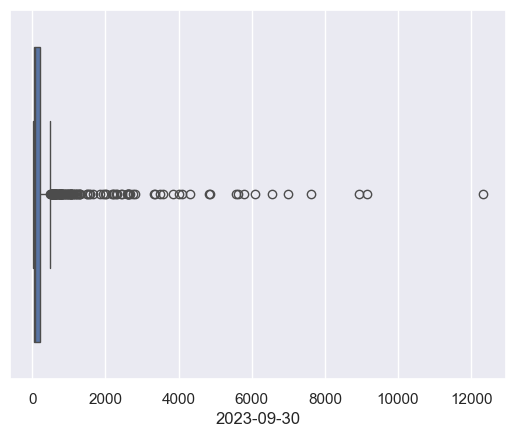

In [614]:
sns.boxplot(x=df['2023-09-30'])

<Axes: xlabel='2023-10-31'>

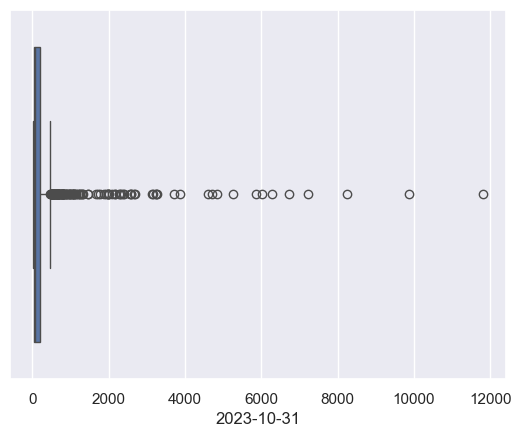

In [615]:
sns.boxplot(x=df['2023-10-31'])

<Axes: xlabel='2023-11-30'>

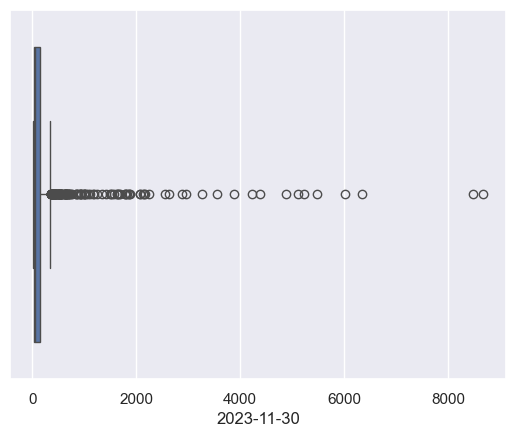

In [617]:
sns.boxplot(x=df['2023-11-30'])

<Axes: xlabel='2023-12-31'>

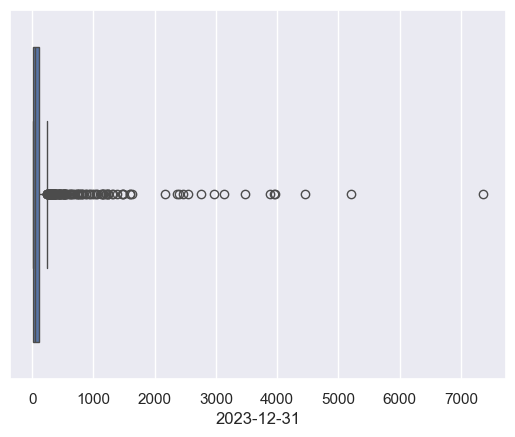

In [618]:
sns.boxplot(x=df['2023-12-31'])

<Axes: xlabel='2024-01-31'>

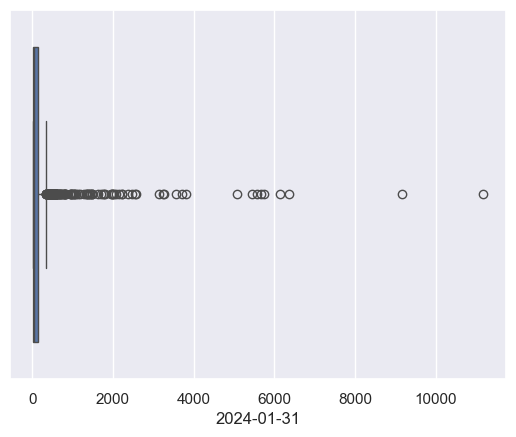

In [620]:
sns.boxplot(x=df['2024-01-31'])

<Axes: xlabel='2024-02-29'>

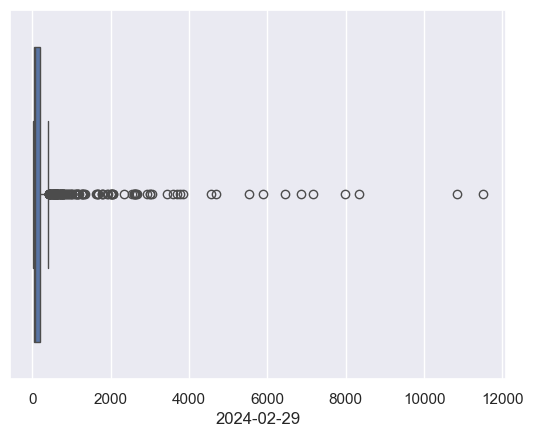

In [621]:
sns.boxplot(x=df['2024-02-29'])

<Axes: xlabel='2024-03-31'>

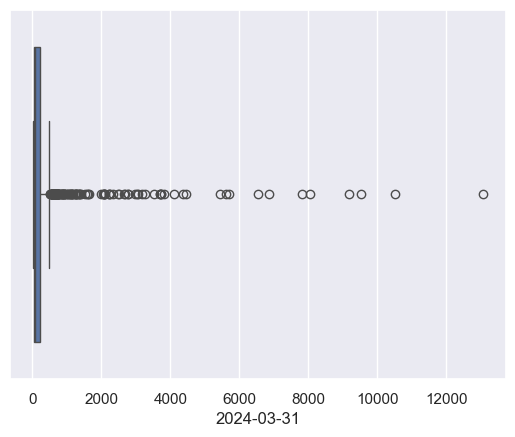

In [622]:
sns.boxplot(x=df['2024-03-31'])

<Axes: xlabel='2024-04-30'>

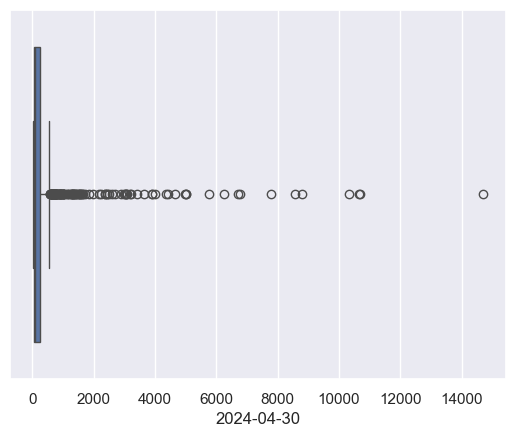

In [624]:
sns.boxplot(x=df['2024-04-30'])

<Axes: xlabel='2024-05-31'>

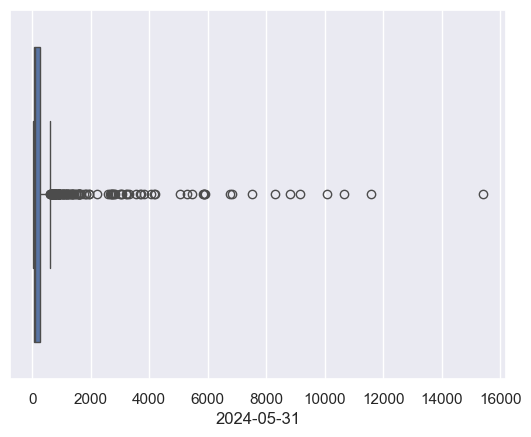

In [625]:
sns.boxplot(x=df['2024-05-31'])

<Axes: xlabel='2024-06-30'>

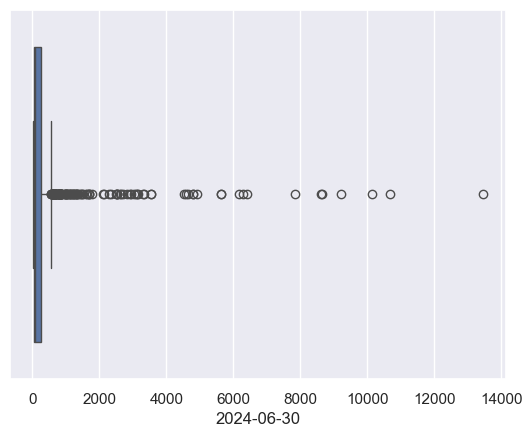

In [627]:
sns.boxplot(x=df['2024-06-30'])

<Axes: xlabel='2024-07-31'>

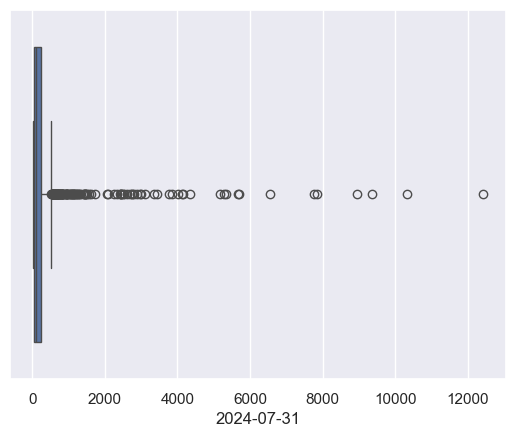

In [628]:
sns.boxplot(x=df['2024-07-31'])

<Axes: xlabel='2024-08-31'>

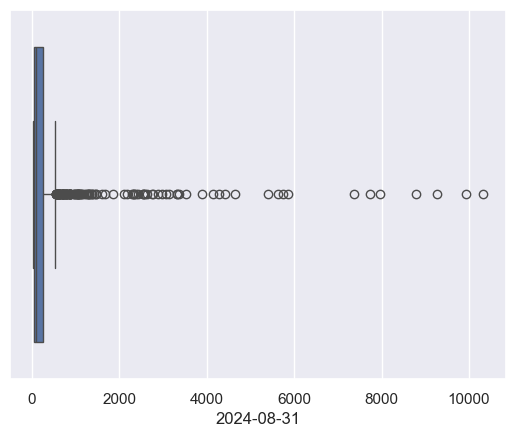

In [629]:
sns.boxplot(x=df['2024-08-31'])

<Axes: xlabel='2024-09-30'>

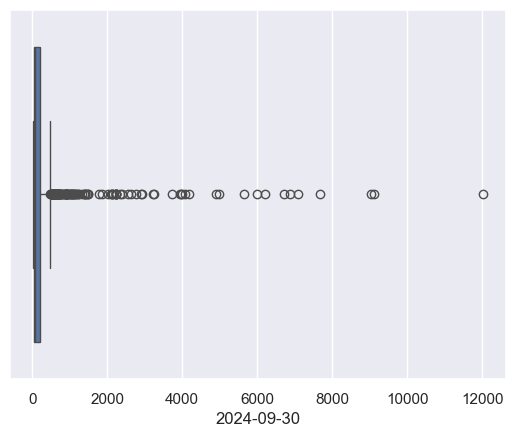

In [631]:
sns.boxplot(x=df['2024-09-30'])

<Axes: xlabel='2024-10-31'>

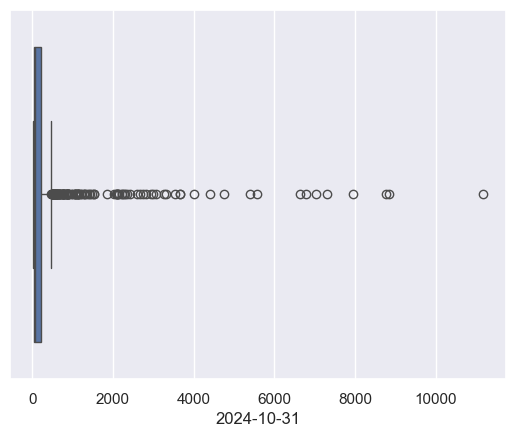

In [632]:
sns.boxplot(x=df['2024-10-31'])

### Looking at all the charts for the date columns I'm seeing small boxes for the data. It looks like a lot of the values were considered outliers, but if everything is an outlier than I'm assuming nothing is.

# Review this with another team member to see if my assumption above is correct. I may not even need to remove any outliers?

In [644]:
date_columns = [col for col in df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

date_df = df[date_columns]
Q1 = date_df.quantile(0.25)
Q3 = date_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2023-01-31    122.5
2023-02-28    129.0
2023-03-31    183.5
2023-04-30    193.5
2023-05-31    201.5
2023-06-30    207.0
2023-07-31    182.5
2023-08-31    191.0
2023-09-30    179.0
2023-10-31    169.0
2023-11-30    128.0
2023-12-31     86.5
2024-01-31    123.5
2024-02-29    153.0
2024-03-31    182.0
2024-04-30    209.5
2024-05-31    223.0
2024-06-30    205.5
2024-07-31    193.0
2024-08-31    197.0
2024-09-30    170.5
2024-10-31    168.0
dtype: float64


### Let's look at the total listings for each state by year 2024 vs 2023.

#### As mentioned above I'll only use the months of January-February for both years.

In [ ]:
drop_nov_dec = ['2023-11-30', '2023-12-31']
df = df.drop(columns=drop_nov_dec)

In [652]:
dates_2023 = [col for col in df.columns if col.startswith('2023')]
dates_2024 = [col for col in df.columns if col.startswith('2024')]

df['TotalListings_2023'] = df[dates_2023].sum(axis=1)
df['TotalListings_2024'] = df[dates_2024].sum(axis=1)

state_totals_2023 = df.groupby('State')['TotalListings_2023'].sum()
state_totals_2024 = df.groupby('State')['TotalListings_2024'].sum()

state_totals_comparison = pd.DataFrame({
    '2023 Listings': state_totals_2023,
    '2024 Listings': state_totals_2024
}).sort_values(by='2023 Listings', ascending=False)

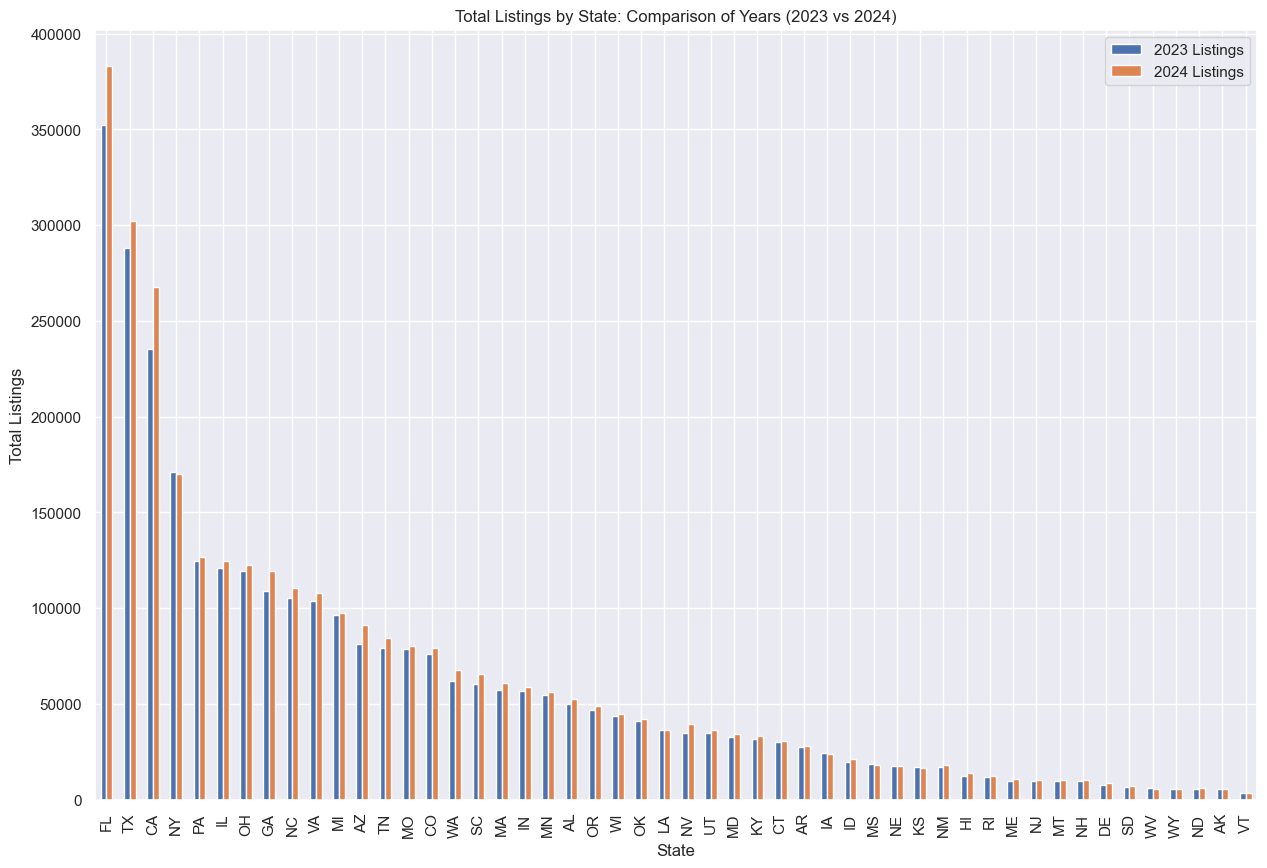

In [654]:
state_totals_comparison.plot(kind='bar', figsize=(15,10))
plt.title("Total Listings by State: Comparison of Years (2023 vs 2024)")
plt.xlabel('State')
plt.ylabel("Total Listings")
plt.show()

#### Florida seems to be a clear winner in terms of listings each year having the most both years.

### Now let's look at the total listings by month compared by years.

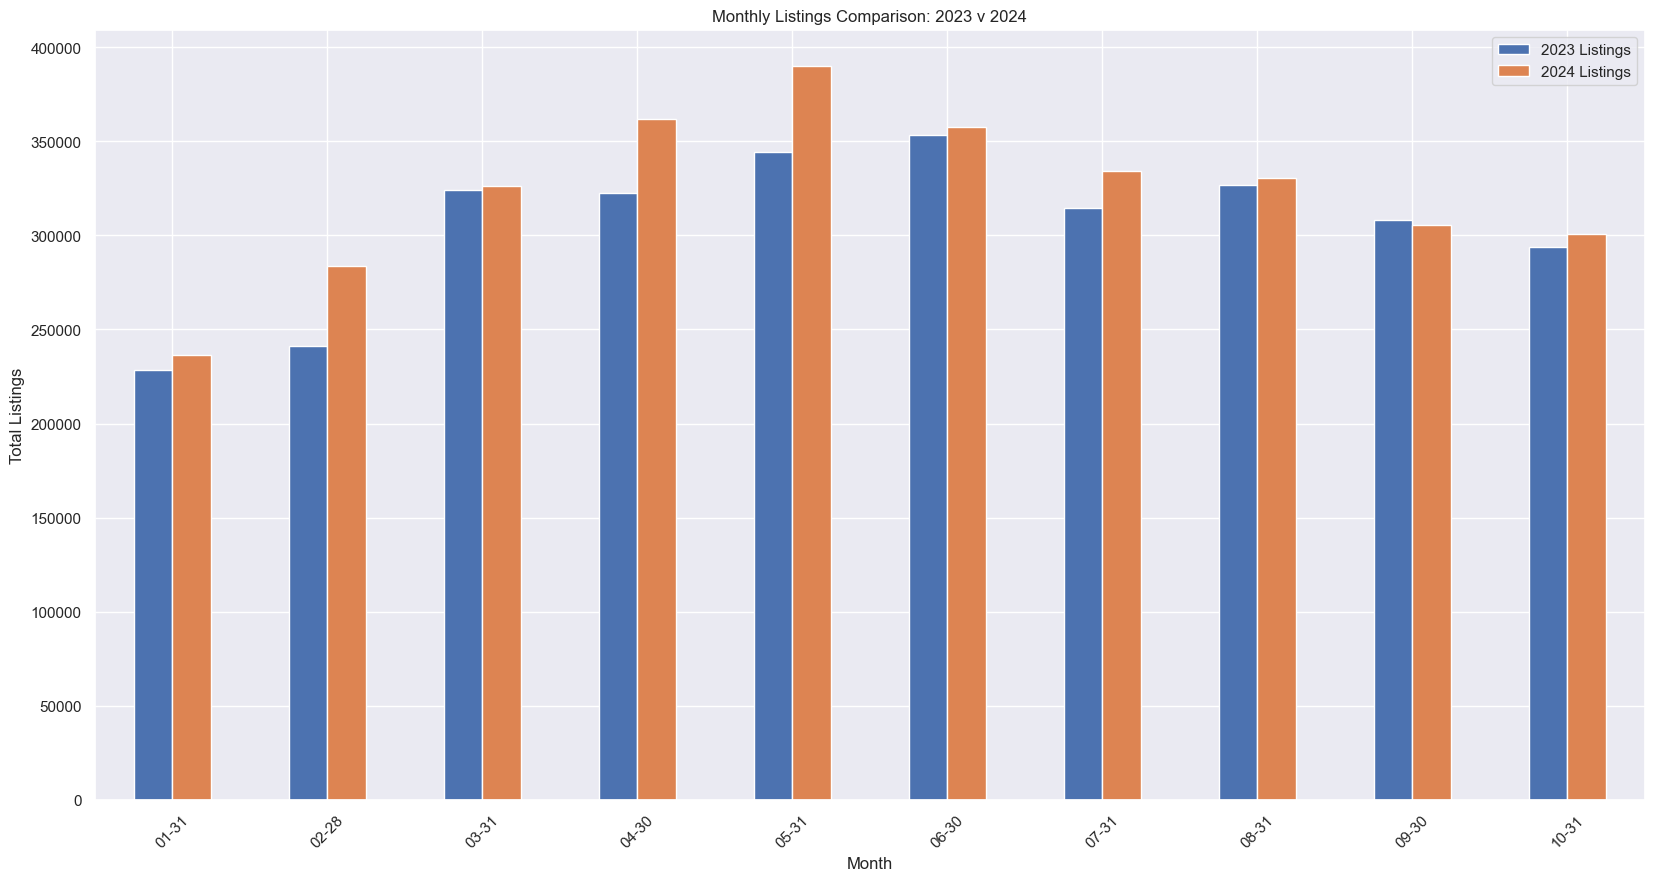

In [656]:
monthly_totals_2023 = df[dates_2023].sum()
monthly_totals_2024 = df[dates_2024].sum()

comparison_df = pd.DataFrame({
    'Month': monthly_totals_2023.index.str.slice(5),
    '2023 Listings': monthly_totals_2023.values,
    '2024 Listings': monthly_totals_2024.values,
})

comparison_df.plot(x='Month', kind='bar', figsize=(20,10))
plt.title("Monthly Listings Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()

#### We can definitely see that 2024 overall had more listings than 2023. The peak of 2024 was in May while in 2023 it was June.

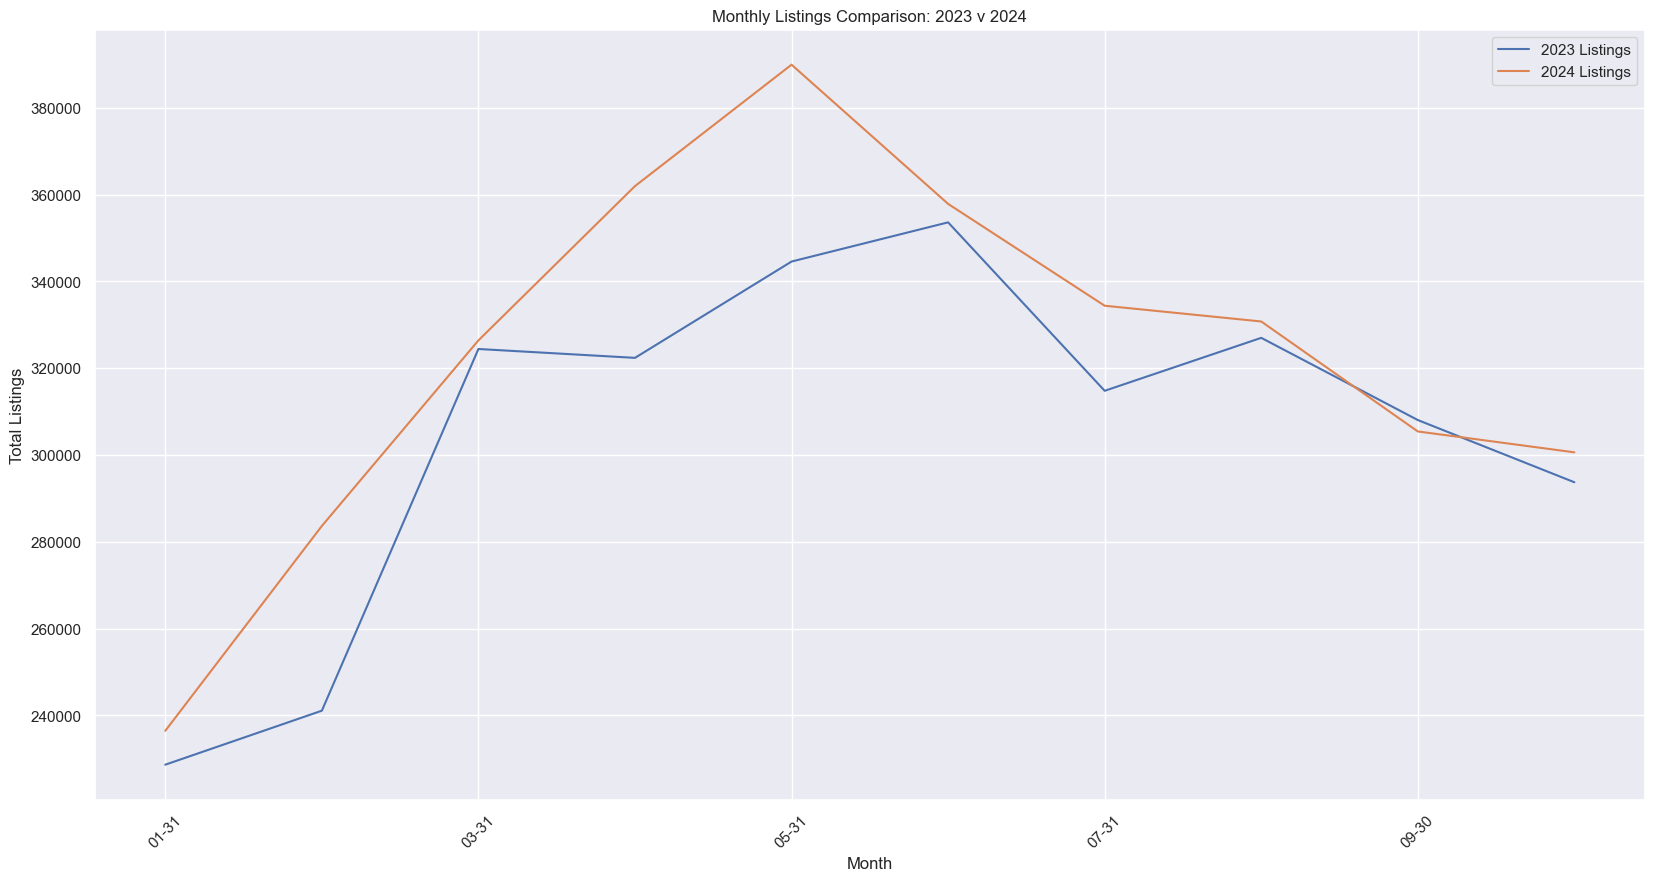

In [658]:
comparison_df.plot(x='Month', kind='line', figsize=(20,10))
plt.title("Monthly Listings Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()

#### When comparing the years for the same months January - October, we see that overall 2024 has had more listings most of the year then 2023. The listings peaked in May of 2024 and as we approached the winter months, they have steadily declined. Overall it looks like listings are going down now that we are past the summer months.

### Now let's take a look at the listing sales prices and see if they have been increasing in 2024 vs 2023.

In [679]:
price_df = pd.read_csv("./Median_list_price_month.csv")
price_df.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,255000.0,264900.0,269900.0,279000.0,281000.0,...,379000.0,385000.0,394000.0,399900.0,407900.0,409900.0,400000.0,399900.0,399900.0,399000.0
1,394913,1,"New York, NY",msa,NY,489000.0,505000.0,515000.0,519000.0,529900.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
2,753899,2,"Los Angeles, CA",msa,CA,709000.0,725000.0,730000.0,750000.0,750000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
3,394463,3,"Chicago, IL",msa,IL,269900.0,289000.0,294900.0,299900.0,307000.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
4,394514,4,"Dallas, TX",msa,TX,318000.0,325000.0,325990.0,334500.0,334900.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
5,394692,5,"Houston, TX",msa,TX,289500.0,294900.0,299000.0,299900.0,299999.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
6,395209,6,"Washington, DC",msa,VA,392000.0,400000.0,424900.0,435000.0,439900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
7,394974,7,"Philadelphia, PA",msa,PA,219000.0,225000.0,232500.0,244900.0,250000.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
8,394856,8,"Miami, FL",msa,FL,364900.0,365900.0,369000.0,369900.0,374300.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
9,394347,9,"Atlanta, GA",msa,GA,272000.0,279900.0,289900.0,299900.0,300000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0


In [685]:
price_df.tail(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
908,845168,919,"Pearsall, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,225000.0,215000.0,234667.0,200000.0,227225.0,230000.0,235000.0,230000.0,251300.0,257000.0
909,394330,920,"Andrews, TX",msa,TX,220000.0,215750.0,214000.0,228000.0,240000.0,...,257000.0,294000.0,282500.0,290500.0,293000.0,275500.0,264000.0,284950.0,327000.0,302450.0
910,786253,921,"Brownsville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,234000.0,234000.0,229950.0,236950.0,220950.0,205950.0,199900.0,197450.0,222500.0,248450.0
911,395112,922,"Spirit Lake, IA",msa,IA,249000.0,258500.0,271900.0,289900.0,289900.0,...,441950.0,424900.0,414900.0,424500.0,459900.0,459900.0,459900.0,577000.0,549900.0,544900.0
912,394594,923,"Fitzgerald, GA",msa,GA,100000.0,89999.0,89900.0,94500.0,94500.0,...,162500.0,166750.0,166750.0,167000.0,165000.0,165000.0,185000.0,194900.0,189900.0,179900.0
913,753927,924,"Winnemucca, NV",msa,NV,210000.0,210000.0,214000.0,218000.0,215000.0,...,339800.0,339800.0,369900.0,369900.0,345000.0,359999.0,369900.0,347500.0,369900.0,369900.0
914,394841,925,"Maysville, KY",msa,KY,127500.0,126450.0,132000.0,129950.0,132000.0,...,164900.0,195000.0,200000.0,204500.0,194750.0,194900.0,194900.0,218950.0,229000.0,214500.0
915,395104,926,"Snyder, TX",msa,TX,139950.0,133000.0,129900.0,138000.0,139000.0,...,152450.0,142000.0,165000.0,142000.0,165000.0,190000.0,184000.0,149450.0,159500.0,162000.0
916,394676,927,"Helena, AR",msa,AR,NaN,NaN,NaN,NaN,NaN,...,119000.0,89250.0,142450.0,129900.0,127450.0,140500.0,165000.0,141000.0,133000.0,125500.0
917,395111,928,"Spencer, IA",msa,IA,144500.0,141250.0,152400.0,149900.0,154900.0,...,215000.0,234900.0,234000.0,218000.0,225000.0,219000.0,217250.0,192250.0,183750.0,186250.0


#### The data is very similar to the new listings data, so we'll remove the first row and only use the 2023 & 2024 years again to compare the same months.

In [691]:
price_start_date = '2018-01-31'
price_end_date = '2022-12-31'

price_df = price_df.drop(index=0).reset_index(drop=True)

price_date_columns = [col for col in price_df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

columns_to_drop = [col for col in price_date_columns if price_start_date <= col <= price_end_date]
price_df = price_df.drop(columns=columns_to_drop)

price_df["RegionName"] = price_df["RegionName"].apply(lambda x: x.split(',')[0])
price_df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
1,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
2,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
3,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
4,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
5,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
6,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
7,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0
8,394976,11,Phoenix,msa,AZ,465000.0,474900.0,479900.0,492500.0,499900.0,...,507927.0,513000.0,514999.0,520000.0,515000.0,510000.0,499999.0,499000.0,499900.0,500000.0
9,395057,12,San Francisco,msa,CA,949000.0,995000.0,1025000.0,1089000.0,1098000.0,...,930000.0,995000.0,999000.0,999888.0,1050000.0,999000.0,980000.0,959000.0,995551.0,995000.0


In [695]:
price_df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
2023-01-31    float64
2023-02-28    float64
2023-03-31    float64
2023-04-30    float64
2023-05-31    float64
2023-06-30    float64
2023-07-31    float64
2023-08-31    float64
2023-09-30    float64
2023-10-31    float64
2023-11-30    float64
2023-12-31    float64
2024-01-31    float64
2024-02-29    float64
2024-03-31    float64
2024-04-30    float64
2024-05-31    float64
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
dtype: object

In [701]:
price_df.count()

RegionID      925
SizeRank      925
RegionName    925
RegionType    925
StateName     925
2023-01-31    917
2023-02-28    919
2023-03-31    913
2023-04-30    918
2023-05-31    918
2023-06-30    917
2023-07-31    917
2023-08-31    920
2023-09-30    920
2023-10-31    922
2023-11-30    921
2023-12-31    920
2024-01-31    921
2024-02-29    921
2024-03-31    922
2024-04-30    920
2024-05-31    924
2024-06-30    924
2024-07-31    925
2024-08-31    925
2024-09-30    924
2024-10-31    924
dtype: int64

In [703]:
price_df = price_df.rename(columns={"SizeRank": "Rank", "RegionName": "City", "StateName": "State"})
price_df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
1,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
2,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
3,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
4,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
5,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
6,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
7,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0
8,394976,11,Phoenix,msa,AZ,465000.0,474900.0,479900.0,492500.0,499900.0,...,507927.0,513000.0,514999.0,520000.0,515000.0,510000.0,499999.0,499000.0,499900.0,500000.0
9,395057,12,San Francisco,msa,CA,949000.0,995000.0,1025000.0,1089000.0,1098000.0,...,930000.0,995000.0,999000.0,999888.0,1050000.0,999000.0,980000.0,959000.0,995551.0,995000.0


In [705]:
price_df.shape

(925, 27)

In [707]:
duplicate_rows_df = price_df[price_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 27)


In [709]:
price_df.count()

RegionID      925
Rank          925
City          925
RegionType    925
State         925
2023-01-31    917
2023-02-28    919
2023-03-31    913
2023-04-30    918
2023-05-31    918
2023-06-30    917
2023-07-31    917
2023-08-31    920
2023-09-30    920
2023-10-31    922
2023-11-30    921
2023-12-31    920
2024-01-31    921
2024-02-29    921
2024-03-31    922
2024-04-30    920
2024-05-31    924
2024-06-30    924
2024-07-31    925
2024-08-31    925
2024-09-30    924
2024-10-31    924
dtype: int64

In [711]:
price_df = price_df.drop_duplicates()
price_df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
1,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
2,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
3,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
4,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
5,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
6,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
7,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0
8,394976,11,Phoenix,msa,AZ,465000.0,474900.0,479900.0,492500.0,499900.0,...,507927.0,513000.0,514999.0,520000.0,515000.0,510000.0,499999.0,499000.0,499900.0,500000.0
9,395057,12,San Francisco,msa,CA,949000.0,995000.0,1025000.0,1089000.0,1098000.0,...,930000.0,995000.0,999000.0,999888.0,1050000.0,999000.0,980000.0,959000.0,995551.0,995000.0


In [713]:
price_df.count()

RegionID      925
Rank          925
City          925
RegionType    925
State         925
2023-01-31    917
2023-02-28    919
2023-03-31    913
2023-04-30    918
2023-05-31    918
2023-06-30    917
2023-07-31    917
2023-08-31    920
2023-09-30    920
2023-10-31    922
2023-11-30    921
2023-12-31    920
2024-01-31    921
2024-02-29    921
2024-03-31    922
2024-04-30    920
2024-05-31    924
2024-06-30    924
2024-07-31    925
2024-08-31    925
2024-09-30    924
2024-10-31    924
dtype: int64

In [715]:
print(price_df.isnull().sum())

RegionID       0
Rank           0
City           0
RegionType     0
State          0
2023-01-31     8
2023-02-28     6
2023-03-31    12
2023-04-30     7
2023-05-31     7
2023-06-30     8
2023-07-31     8
2023-08-31     5
2023-09-30     5
2023-10-31     3
2023-11-30     4
2023-12-31     5
2024-01-31     4
2024-02-29     4
2024-03-31     3
2024-04-30     5
2024-05-31     1
2024-06-30     1
2024-07-31     0
2024-08-31     0
2024-09-30     1
2024-10-31     1
dtype: int64


In [717]:
price_df = price_df.dropna()
price_df.count()

RegionID      888
Rank          888
City          888
RegionType    888
State         888
2023-01-31    888
2023-02-28    888
2023-03-31    888
2023-04-30    888
2023-05-31    888
2023-06-30    888
2023-07-31    888
2023-08-31    888
2023-09-30    888
2023-10-31    888
2023-11-30    888
2023-12-31    888
2024-01-31    888
2024-02-29    888
2024-03-31    888
2024-04-30    888
2024-05-31    888
2024-06-30    888
2024-07-31    888
2024-08-31    888
2024-09-30    888
2024-10-31    888
dtype: int64

In [719]:
print(price_df.isnull().sum())

RegionID      0
Rank          0
City          0
RegionType    0
State         0
2023-01-31    0
2023-02-28    0
2023-03-31    0
2023-04-30    0
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
2023-10-31    0
2023-11-30    0
2023-12-31    0
2024-01-31    0
2024-02-29    0
2024-03-31    0
2024-04-30    0
2024-05-31    0
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
dtype: int64


<Axes: xlabel='2023-01-31'>

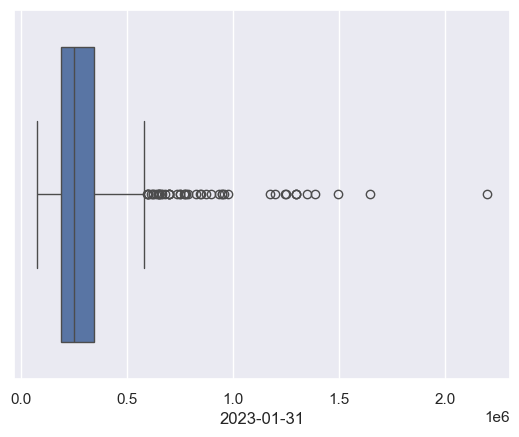

In [721]:
sns.boxplot(x=price_df['2023-01-31'])

<Axes: xlabel='2023-05-31'>

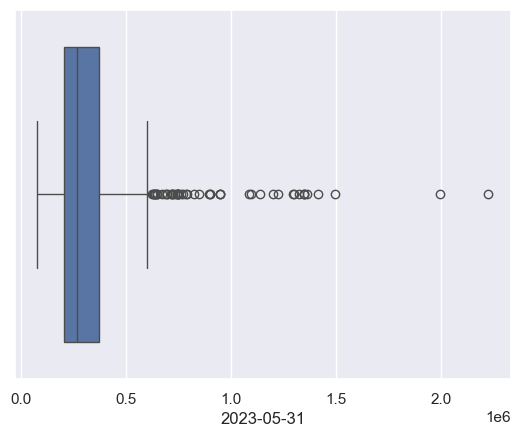

In [723]:
sns.boxplot(x=price_df['2023-05-31'])

<Axes: xlabel='2024-01-31'>

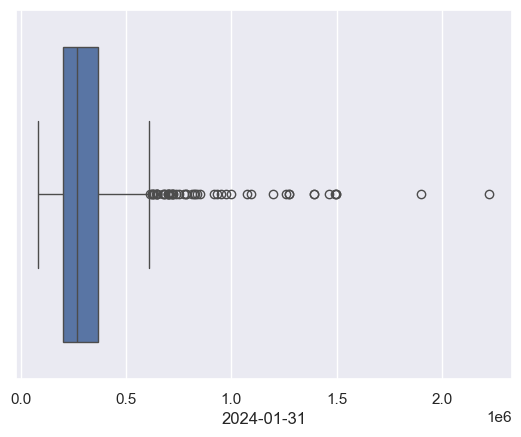

In [725]:
sns.boxplot(x=price_df['2024-01-31'])

<Axes: xlabel='2024-05-31'>

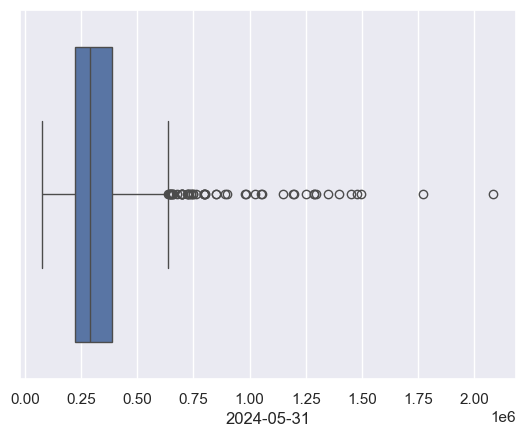

In [727]:
sns.boxplot(x=price_df['2024-05-31'])

In [729]:
price_date_columns = [col for col in price_df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

price_date_df = price_df[price_date_columns]
Q1 = price_date_df.quantile(0.25)
Q3 = price_date_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2023-01-31    158450.00
2023-02-28    162691.25
2023-03-31    159675.00
2023-04-30    169100.00
2023-05-31    164994.75
2023-06-30    160100.00
2023-07-31    164000.00
2023-08-31    160000.00
2023-09-30    165412.50
2023-10-31    164575.00
2023-11-30    169350.00
2023-12-31    165000.00
2024-01-31    165375.00
2024-02-29    161925.00
2024-03-31    165000.00
2024-04-30    164725.00
2024-05-31    165100.00
2024-06-30    170000.00
2024-07-31    164900.00
2024-08-31    160475.00
2024-09-30    160000.00
2024-10-31    155262.50
dtype: float64


#### Looking at the charts again, I definitely have a bigger box that indicates that the prices are closer to each other, but there are quite a few outliers still. My guess is these are from states where housing prices have really shot up. I need to decide whether or not to remove them. Maybe compare them with the outliers removed and not remmoved?